In [15]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [16]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [17]:
# https://www.researchgate.net/profile/Yifan-Ding-4/publication/323026933/figure/fig2/AS:591960742043648@1518145847527/Some-labeled-and-unlabeled-images-of-CIFAR-10-after-Stage-1.png

# Load in the data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Print shape of (x_train, y_train), (x_test, y_test)
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape", y_test.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000, 1)
x_test.shape: (10000, 32, 32, 3)
y_test.shape (10000, 1)


In [18]:
32*32*3

3072

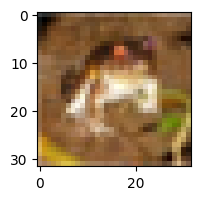

Label: [6]


In [19]:
# Plot the 0th image from x_train
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])
plt.show()
print("Label:", y_train[0])

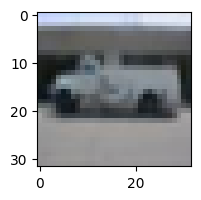

Label: [9]


In [20]:
# Plot the 110th image from x_train
plt.figure(figsize=(2,2))
plt.imshow(x_train[110])
plt.show()
print("Label:", y_train[110])

In [21]:
x_train, x_test = x_train / 255.0, x_test / 255.0

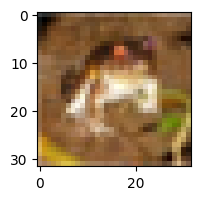

Label: [6]


In [22]:
# Plot the 0th image from x_train
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])
plt.show()
print("Label:", y_train[0])

In [23]:
print("Before\nx_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

Before
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000, 1)


In [24]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print("After\nx_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

After
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [25]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [26]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [27]:
x_train[0].shape

(32, 32, 3)

In [28]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [29]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.4366 - loss: 1.8169 - val_accuracy: 0.6579 - val_loss: 0.9944
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6956 - loss: 0.8779 - val_accuracy: 0.6958 - val_loss: 0.9141
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7584 - loss: 0.7002 - val_accuracy: 0.7147 - val_loss: 0.8543
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8021 - loss: 0.5706 - val_accuracy: 0.7436 - val_loss: 0.7566
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8305 - loss: 0.4953 - val_accuracy: 0.7384 - val_loss: 0.8502
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8580 - loss: 0.4162 - val_accuracy: 0.8081 - val_loss: 0.6202
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8793 - loss: 0.3486 - val_accuracy: 0.8135 - val_loss: 0.5867
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9046 - loss: 0.2775 -

In [31]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                 height_shift_range=0.1,
                                                                 horizontal_flip=True)
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test),
                        steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 4:43 182ms/step - accuracy: 0.7812 - loss: 0.6866

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8100 - loss: 0.6103 - val_accuracy: 0.8373 - val_loss: 0.4890
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9062 - loss: 0.1804

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 348us/step - accuracy: 0.9062 - loss: 0.1804 - val_accuracy: 0.8376 - val_loss: 0.4899
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8578 - loss: 0.4365 - val_accuracy: 0.8222 - val_loss: 0.5332
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step - accuracy: 0.8125 - loss: 0.5920 - val_accuracy: 0.8222 - val_loss: 0.5352
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8634 - loss: 0.4019 - val_accuracy: 0.8490 - val_loss: 0.4742
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 353us/step - accuracy: 1.0000 - loss: 0.0581 - val_accuracy: 0.8482 - val_loss: 0.4758
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8746 - loss: 0.3816 - val_accuracy: 0.8550 - val_loss: 0.4532
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - accuracy: 0.8438 - loss: 0.4215 - val_accuracy: 0.8549 - val_loss: 0.4530
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8803 - loss: 0.36

**Observation:**

We are getting a lower training accuracy but a higher Validation accuracy. Hence, there is lesser Overfitting. Therefore, the model has improved.

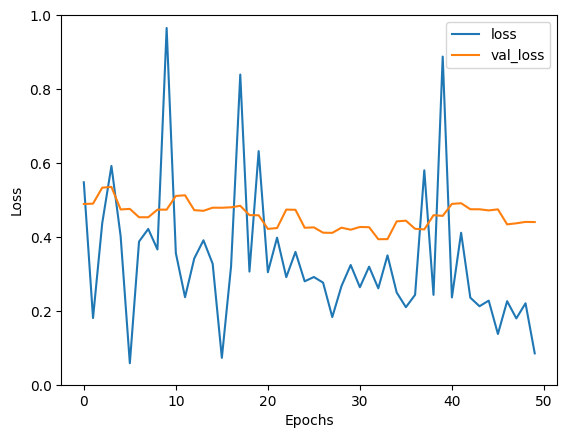

In [34]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0,1])
plt.legend()
plt.show()

**Observation:**

A much better learning curve than before.

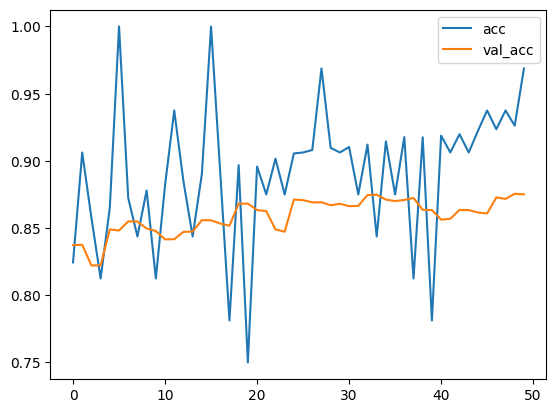

In [35]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Confusion matrix, without normalization
[[930  11  15   6   2   1   3   1  21  10]
 [  5 964   1   1   0   0   3   0   6  20]
 [ 43   3 857  22  15  10  37   5   3   5]
 [ 29   2  55 752  24  45  53  18   9  13]
 [ 10   2  46  27 808  16  66  20   5   0]
 [  8   2  25 135  20 747  20  30   5   8]
 [  6   2  22  18   2   3 943   1   2   1]
 [ 15   2  18  14  21  11   3 905   2   9]
 [ 44   9   6   2   0   0   1   0 923  15]
 [ 14  50   3   2   1   0   1   0   7 922]]


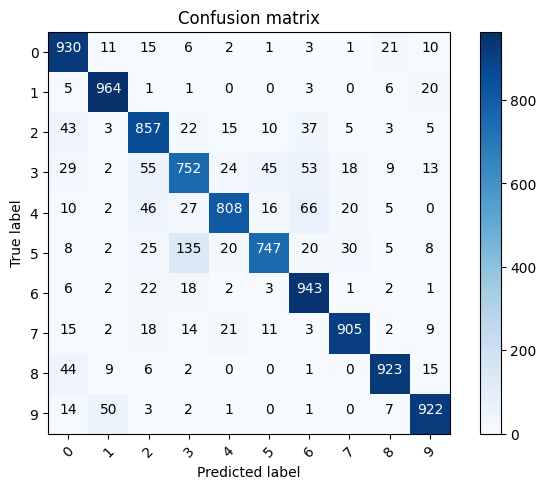

In [36]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



**Observation:**
Much lesser misclassifications as promised before.


In [37]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()
print(labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


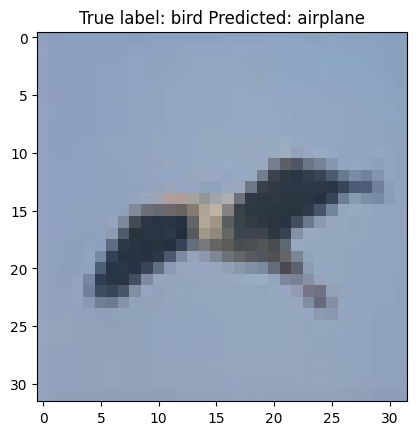

In [38]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

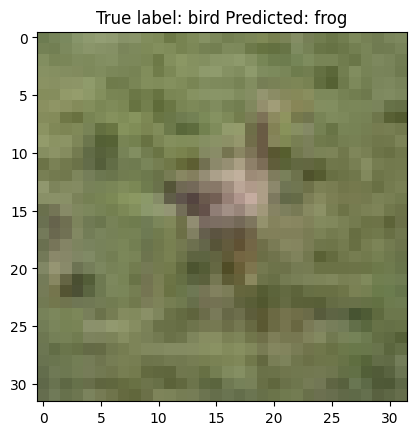

In [39]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

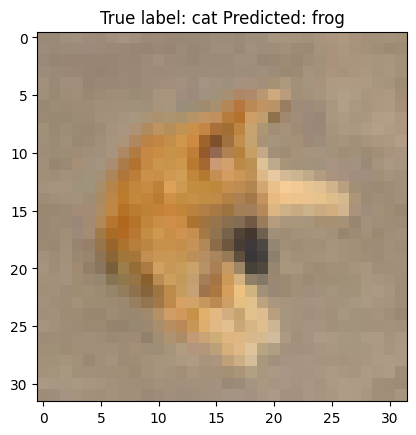

In [40]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

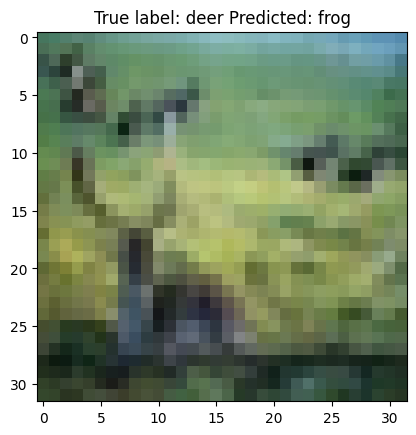

In [41]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [42]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,189,888 (27.43 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,792,662 (18.28 MB)